In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import imgaug.augmenters as iaa
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
import random
import os






# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**1 Reading files**

In [2]:
sampe_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

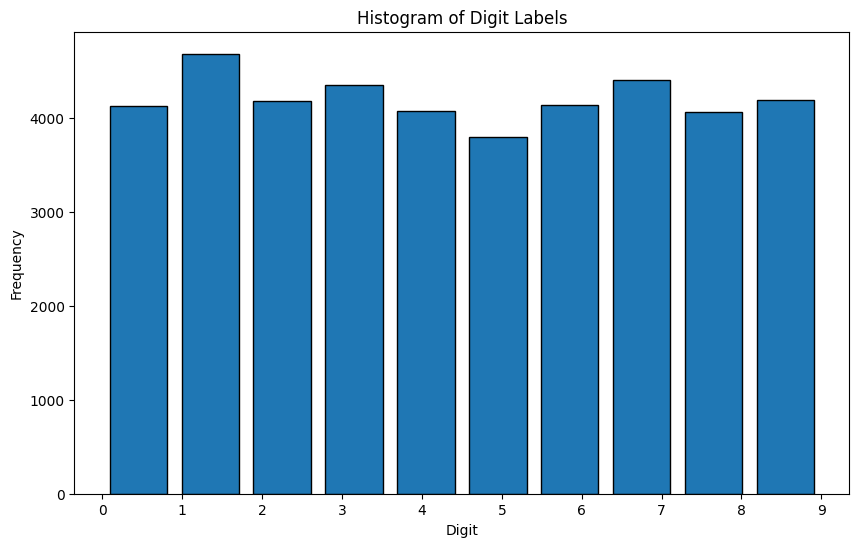

In [3]:
# Load the data

# Load the data
train_df = train.copy()
test_df = test.copy()

# Extract the labels
labels = train_df['label']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(labels, bins=10, edgecolor='black', rwidth=0.8)
plt.title('Histogram of Digit Labels')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.xticks(range(10))  # Ensures x-ticks are at each digit
plt.show()

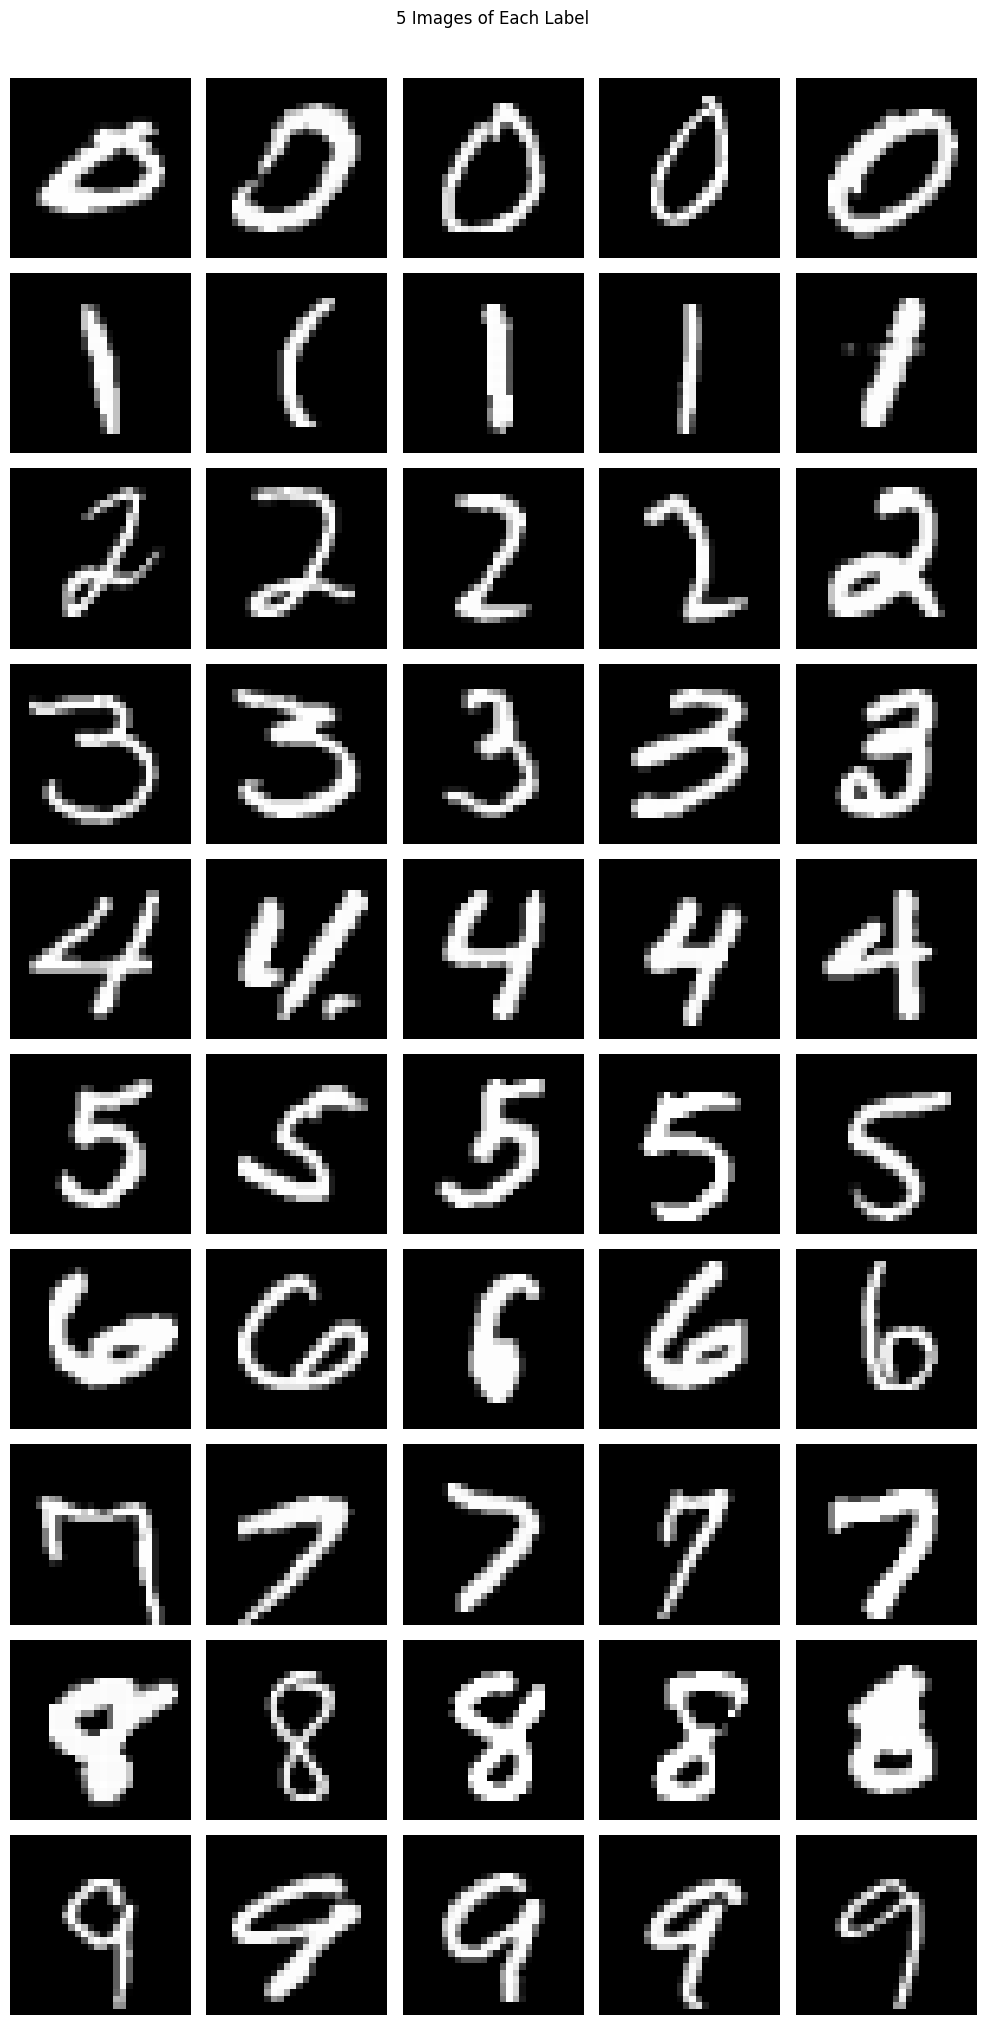

In [4]:
# Load the data
# Assuming `train_df` is your training DataFrame and includes the label and image pixel data

# Reshape data to fit the model (28x28 images)
images = train_df.drop(columns=['label']).values.reshape(-1, 28, 28)
labels = train_df['label'].values

# Plot 5 images for each label
fig, axes = plt.subplots(10, 5, figsize=(10, 20))
fig.suptitle('5 Images of Each Label', y=1.01)

for i in range(10):
    # Get indices of the images with the current label
    label_indices = np.where(labels == i)[0]
    # Randomly select 5 indices
    selected_indices = np.random.choice(label_indices, 5, replace=False)
    
    for j in range(5):
        ax = axes[i, j]
        ax.imshow(images[selected_indices[j]], cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Label {i}', rotation=0, labelpad=25, fontsize=12, ha='right')

plt.tight_layout()
plt.show()

Number of mostly black images: 27555
Number of mostly white images: 8


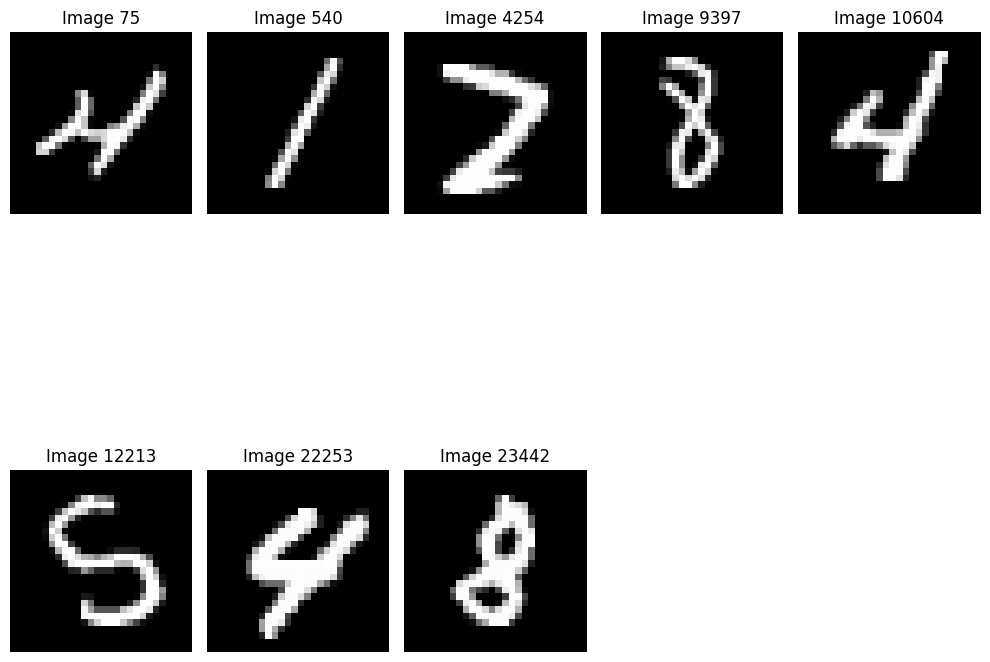

In [5]:
# # Define thresholds for mostly black and mostly white
black_threshold = 60   # Adjust as needed
white_threshold = 80  # Adjust as needed

# Initialize counters
mostly_black_count = 0
mostly_white_count = 0

# List to store indices of mostly white images
mostly_white_indices = []

# Iterate through the images
for i, image in enumerate(test_df.values.reshape(-1, 28, 28, 1)):
    # Convert the image to grayscale
    grayscale_image = np.mean(image, axis=(0, 1))  # Calculate mean along channels axis (axis 2)
    
    # Count the number of pixels that are mostly black or mostly white
    black_pixels = np.sum(grayscale_image < black_threshold)
    white_pixels = np.sum(grayscale_image > white_threshold)
    
    # Check if the image is mostly black or mostly white
    if black_pixels > white_pixels:
        mostly_black_count += 1
    elif white_pixels > black_pixels:
        mostly_white_count += 1
        mostly_white_indices.append(i)  # Store index of mostly white image

# Print the results
print(f"Number of mostly black images: {mostly_black_count}")
print(f"Number of mostly white images: {mostly_white_count}")

# Plot some of the mostly white images
plt.figure(figsize=(10, 10))
for i, index in enumerate(mostly_white_indices[:8]):  # Plot first 10 mostly white images
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[index], cmap='gray')
    plt.title(f"Image {index}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Extract features and labels
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

# Normalize pixel values
X_train = X_train / 255.0

# Reshape data to fit the model (28x28 images)
X_train = X_train.values.reshape(-1, 28, 28, 1)

In [8]:

X_train_further, X_test_further, y_train_further, y_test_further = train_test_split(X_train, y_train, test_size=0.05, stratify=y_train, random_state=42)


In [9]:

y_train_further = to_categorical(y_train_further, num_classes=10)
y_test_further = to_categorical(y_test_further, num_classes=10)
y_train = to_categorical(y_train, num_classes=10)



2024-06-08 11:20:23.655173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 11:20:23.655276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 11:20:23.779712: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
# y_train_combined = to_categorical(y_train_combined, num_classes=10)

# y_train_combined.shape

In [11]:



# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.08))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_further, y_train_further, epochs=20, batch_size=200, validation_split=0.2)

# Normalize and reshape the test data
X_test = X_test_further / 255.0
X_test = X_test_further.reshape(-1, 28, 28, 1)

# Make predictions on the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


2024-06-08 11:20:37.630838: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 676: 2.83719, expected 1.89899
2024-06-08 11:20:37.630898: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 677: 2.32709, expected 1.38889
2024-06-08 11:20:37.630908: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 678: 3.29225, expected 2.35405
2024-06-08 11:20:37.630915: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 679: 3.53699, expected 2.59879
2024-06-08 11:20:37.630923: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 680: 3.4801, expected 2.5419
2024-06-08 11:20:37.630931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 681: 3.39706, expected 2.45886
2024-06-08 11:20:37.630945: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 682: 3.30377, expected 2.36557
2024-06-08 11:20:37.630953: E external/loca

 61/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7033 - loss: 1.0845

I0000 00:00:1717845639.521012     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717845639.540143     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


143/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.7539

2024-06-08 11:20:40.617642: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.93534, expected 1.56462
2024-06-08 11:20:40.617703: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.51823, expected 2.14752
2024-06-08 11:20:40.617719: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.41239, expected 2.04167
2024-06-08 11:20:40.617733: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 2.2351, expected 1.86438
2024-06-08 11:20:40.617744: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 2.39146, expected 2.02074
2024-06-08 11:20:40.617754: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 2.59066, expected 2.21994
2024-06-08 11:20:40.617765: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 25: 2.03018, expected 1.65947
2024-06-08 11:20:40.617777: E external/local_xla/xla

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7996 - loss: 0.7170

W0000 00:00:1717845642.572310     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-06-08 11:20:42.723947: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.10384, expected 2.18046
2024-06-08 11:20:42.724008: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.96363, expected 2.04025
2024-06-08 11:20:42.724021: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.22295, expected 2.29957
2024-06-08 11:20:42.724033: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.98187, expected 2.05849
2024-06-08 11:20:42.724069: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.05785, expected 3.13447
2024-06-08 11:20:42.724081: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.87337, expected 2.94999
2024-06-08 11:20:42.724092: E external/local_xla/xla/service/gpu/

160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8001 - loss: 0.7151 - val_accuracy: 0.9501 - val_loss: 0.1702
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1543 - val_accuracy: 0.9707 - val_loss: 0.1038
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0892 - val_accuracy: 0.9777 - val_loss: 0.0816
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.9783 - val_loss: 0.0705
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9866 - loss: 0.0445 - val_accuracy: 0.9822 - val_loss: 0.0636
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0383 - val_accuracy: 0.9846 - val_loss: 0.0560
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0295 - val_accuracy: 0.9818 - val_loss: 0.0619
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0281 - val_accuracy: 0.9812 - val

2024-06-08 11:20:53.100258: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-06-08 11:20:53.100317: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-06-08 11:20:53.100326: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-06-08 11:20:53.100334: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-06-08 11:20:53.100342: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-06-08 11:20:53.100349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-06-08 11:20:53.100357: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-06-08 11:20:53.100365: E external/local_xla/xla/se

39/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

2024-06-08 11:20:53.523064: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.53322, expected 1.63797
2024-06-08 11:20:53.523134: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.1719, expected 1.27664
2024-06-08 11:20:53.523143: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.70028, expected 1.80502
2024-06-08 11:20:53.523151: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.19668, expected 1.30142
2024-06-08 11:20:53.523159: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.41868, expected 2.52342
2024-06-08 11:20:53.523166: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.35505, expected 2.45979
2024-06-08 11:20:53.523174: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.27773, expected 2.38247
2024-06-08 11:20:53.523181: E external/local_xla/xla/ser

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [12]:
target_labels = np.argmax(y_test_further, axis=1)
for_test = pd.DataFrame()
for_test['predicted'] = predicted_labels
for_test['real'] = target_labels


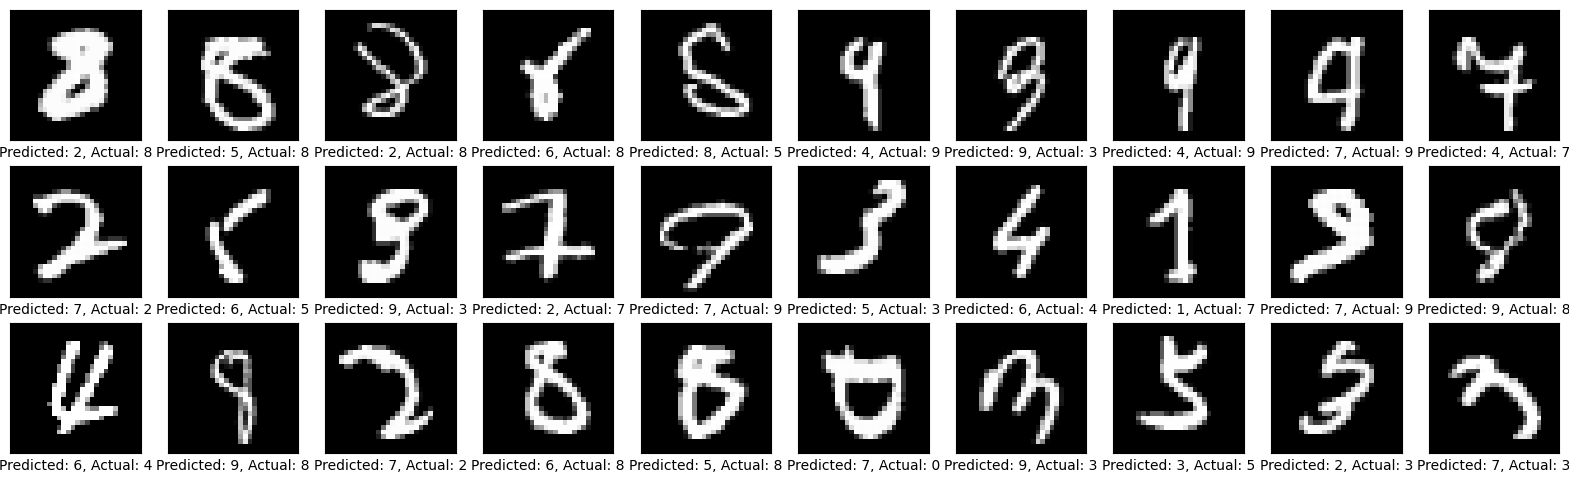

In [15]:
for_test[for_test['predicted'] != for_test['real']]

# Get indices of misclassified images
misclassified_indices = for_test.index[for_test['predicted'] != for_test['real']]

# Plot misclassified images
plt.figure(figsize=(20, 20))
for i, index in enumerate(misclassified_indices):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
    plt.xlabel(f'Predicted: {for_test.loc[index, "predicted"]}, Actual: {for_test.loc[index, "real"]}')
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/120
18/51 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5236 - loss: 1.7966

W0000 00:00:1717849537.661516     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6577 - loss: 1.3092

W0000 00:00:1717849539.791768     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6598 - loss: 1.3008 - val_accuracy: 0.7990 - val_loss: 0.6500
Epoch 2/120
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8634 - loss: 0.4549 - val_accuracy: 0.8460 - val_loss: 0.4938
Epoch 3/120
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9008 - loss: 0.3319 - val_accuracy: 0.8774 - val_loss: 0.3970
Epoch 4/120
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9195 - loss: 0.2666 - val_accuracy: 0.8930 - val_loss: 0.3437
Epoch 5/120
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9301 - loss: 0.2297 - val_accuracy: 0.9037 - val_loss: 0.3096
Epoch 6/120
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9371 - loss: 0.2038 - val_accuracy: 0.9085 - val_loss: 0.2862
Epoch 7/120
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9425 - loss: 0.1853 - val_accuracy: 0.9146 - val_loss: 0.2664
Epoch 8/120
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9470 - loss: 0.1708 - val_accuracy: 0.9198 - val_l

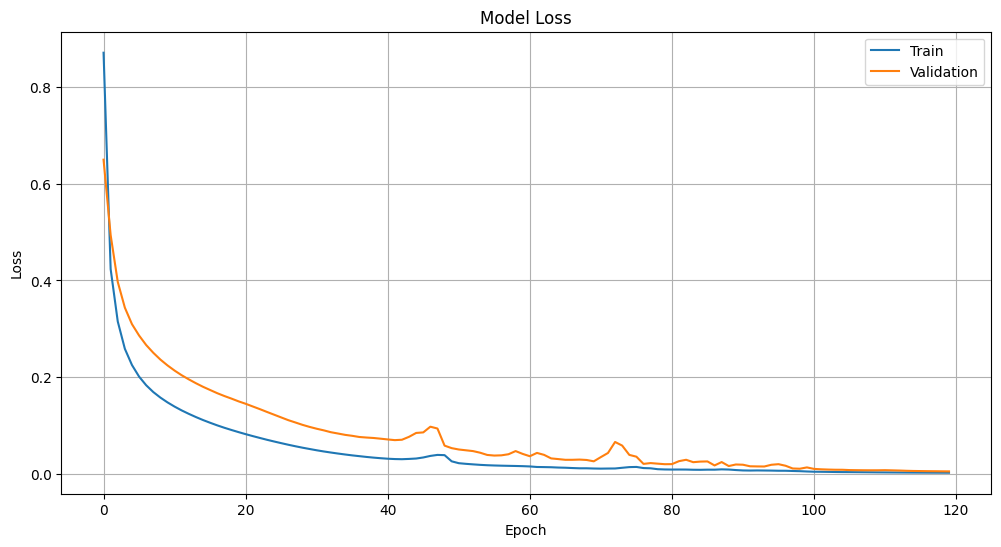

In [32]:
# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Function to add Gaussian noise
def add_noise(images, noise_factor=0.05):
    noise = np.random.randn(*images.shape) * noise_factor
    noisy_images = images + noise
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

def random_erasing_black(image, p=0.5, s=(0.02, 0.4), r=(0.3, 3.3)):
    """
    Randomly erase a rectangle from the image and fill with black pixels.
    
    Args:
    image: Input image (numpy array).
    p: Probability of applying random erasing.
    s: Range of proportion of erased area against input image.
    r: Range of aspect ratio of erased area.
    
    Returns:
    Image with random erasing applied (black pixels in erased area).
    """
    if np.random.rand() > p:
        return image
    
    h, w, _ = image.shape
    area = h * w
    
    while True:
        target_area = np.random.uniform(s[0], s[1]) * area
        aspect_ratio = np.random.uniform(r[0], r[1])
        h_erase = int(np.sqrt(target_area * aspect_ratio))
        w_erase = int(np.sqrt(target_area / aspect_ratio))
        
        if w_erase < w and h_erase < h:
            top = np.random.randint(0, h - h_erase)
            left = np.random.randint(0, w - w_erase)
            bottom = top + h_erase
            right = left + w_erase
            image[top:bottom, left:right, :] = 0
            break
    
    return image

# Load the data
# train_df = pd.read_csv('/mnt/data/train.csv')

# Extract features and labels
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

# Normalize pixel values
X_train = X_train / 255.0

# Reshape data to fit the model (28x28 images)
X_train = X_train.values.reshape(-1, 28, 28, 1)

# Add noise to the images
# X_train_noisy = add_noise(X_train)

# Define the main augmentation sequence
augmenter = iaa.Sequential([
    iaa.Affine(scale=(0.8, 1.2)),
    iaa.CoarseDropout((0.02, 0.1), size_percent=(0.02, 0.1)),  # Add smudge-like effect
    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # Blur to simulate ink spreading
    iaa.Affine(scale={"x": (0.95, 1.0), "y": (1.0, 1.05)})  # Squeeze along the x-axis, stretch along the y-axis
])

# Augment the images
X_train_augmented = augmenter(images=X_train.astype(np.float32))

X_train_erased = [random_erasing_black(img) for img in X_train_augmented]

# Combine original, noisy, and augmented images
X_train_combined = np.concatenate((X_train
#                                    , X_train_noisy,
                                   ,X_train_augmented, X_train_erased))
y_train_combined = np.concatenate((y_train, y_train, y_train))

# One-hot encode the labels
y_train_combined = to_categorical(y_train_combined, num_classes=10)

# Compute class weights
y_train_flat = np.argmax(y_train_combined, axis=1)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train_flat), 
    y=y_train_flat
)
class_weights_dict = dict(enumerate(class_weights))

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train_combined, y_train_combined, epochs=120, batch_size=2000, validation_split=0.2, class_weight=class_weights_dict)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

In [33]:
optimal_epoch = np.argmin(history.history['val_loss']) + 1
print(f'The optimal number of epochs is {optimal_epoch}')


The optimal number of epochs is 120


In [26]:
# Normalize and reshape the test data
X_test = test_df / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Make predictions on the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
X_test.shape

(28000, 28, 28, 1)

In [27]:
# Create submission file
submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('submission_120_epoch_most_stable.csv', index=False)